# Test of class HyperCube lattice

This notebook uses the class in 'HC_Lattice.py' that builds a generic N dimensional lattice, it finds the set of links (E and U), the plaquettes (closed loops of 4 sites, pnly if dimensions>1) and defines the chain that will be used for Jordan-Wigner mapping of fermionic degrees of freedom.

>The code has also the option to visualize the lattice and, if a Gauss law in the applied (import from another class) it can draw the set of links that remain dynamical.

In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
from scipy.sparse.linalg import eigsh
from qiskit.quantum_info import Statevector
import numpy as np
import matplotlib.pyplot as plt
import sys
import random
from sympy import Symbol

In [12]:
sys.path.append("../") # go to parent dir
from qclatticeh.lattice.HC_Lattice import HCLattice

In [13]:
n_sites = [3,2,2]#how many sites for every dimension
while 1 in n_sites:#avoid 1 dimension
    n_sites.remove(1)

dims = len(n_sites) #how many dimensions

pbc = [True,False,False]
dims

3

In [14]:
class_lattice = HCLattice(n_sites=n_sites,pbc=pbc)

In [15]:
#set of random links to keep dynamical
e_op_free_example =random.choices([Symbol(item) for item in class_lattice.list_edges2_e_op],k=5)
e_op_free_example

[E_101y, E_200z, E_011x, E_001y, E_200z]

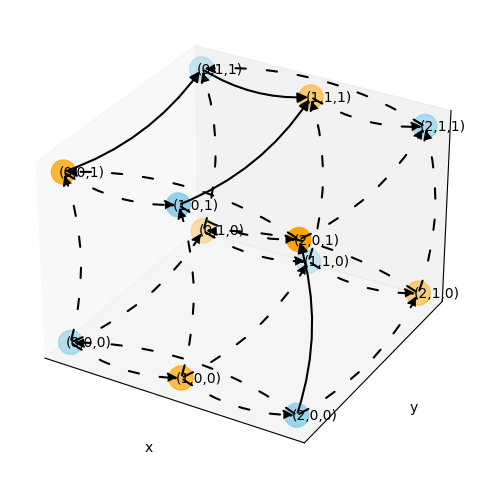

In [16]:
class_lattice.draw_graph_func(gauss_law_fig=True,e_op_free=e_op_free_example)#,savefig_dir='.')


In [17]:
class_lattice.list_plaq_u_op

[['U_000x', 'U_100y', 'U_010x', 'U_000y'],
 ['U_001x', 'U_101y', 'U_011x', 'U_001y'],
 ['U_100x', 'U_200y', 'U_110x', 'U_100y'],
 ['U_101x', 'U_201y', 'U_111x', 'U_101y'],
 ['U_200x', 'U_000y', 'U_210x', 'U_200y'],
 ['U_201x', 'U_001y', 'U_211x', 'U_201y'],
 ['U_000x', 'U_100z', 'U_001x', 'U_000z'],
 ['U_010x', 'U_110z', 'U_011x', 'U_010z'],
 ['U_100x', 'U_200z', 'U_101x', 'U_100z'],
 ['U_110x', 'U_210z', 'U_111x', 'U_110z'],
 ['U_200x', 'U_000z', 'U_201x', 'U_200z'],
 ['U_210x', 'U_010z', 'U_211x', 'U_210z'],
 ['U_000y', 'U_010z', 'U_001y', 'U_000z'],
 ['U_100y', 'U_110z', 'U_101y', 'U_100z'],
 ['U_200y', 'U_210z', 'U_201y', 'U_200z']]

In [18]:
class_lattice.jw_chain

[((0, 0, 0), (1, 0, 0)),
 ((1, 0, 0), (2, 0, 0)),
 ((2, 0, 0), (2, 1, 0)),
 ((2, 1, 0), (1, 1, 0)),
 ((1, 1, 0), (0, 1, 0)),
 ((0, 1, 0), (0, 1, 1)),
 ((0, 1, 1), (1, 1, 1)),
 ((1, 1, 1), (2, 1, 1)),
 ((2, 1, 1), (2, 0, 1)),
 ((2, 0, 1), (1, 0, 1)),
 ((1, 0, 1), (0, 0, 1))]

In [19]:
class_lattice.jw_sites

[(0, 0, 0),
 (1, 0, 0),
 (2, 0, 0),
 (2, 1, 0),
 (1, 1, 0),
 (0, 1, 0),
 (0, 1, 1),
 (1, 1, 1),
 (2, 1, 1),
 (2, 0, 1),
 (1, 0, 1),
 (0, 0, 1)]